In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression, make_blobs
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Generating dataset for classification problem

It is very simple example. We generate dataset with 3 features and 2 classes. Random state helps you, if you want to draw this same set of numbers.

In [102]:
dataset = make_classification(n_samples=200, n_features=3, n_informative=3, n_redundant=0, random_state=42)

df = pd.DataFrame({
        'feature1': dataset[0][:, 0], 
        'feature2': dataset[0][:, 1], 
        'feature3': dataset[0][:, 2],
        'target': dataset[1]
})

df.head()

,feature1,feature2,feature3,target
0,-0.193697,2.017614,-0.617504,1
1,-1.117812,0.258469,2.120633,0
2,0.355726,0.318704,0.984135,0
3,-2.571594,-0.745081,-1.639758,1
4,-0.542344,-1.257413,0.674672,0


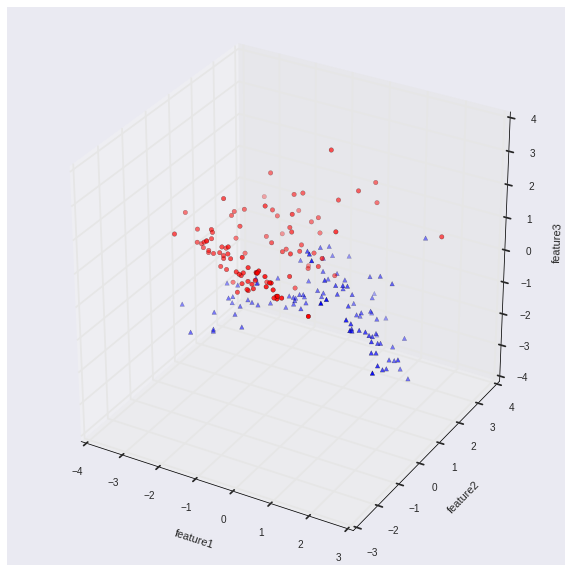

In [198]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for c, m, zl, zh, target in [('r', 'o', -50, -25, 0), ('b', '^', -30, -5, 1)]:

    xs = df[df.target==target].feature1
    ys = df[df.target==target].feature2
    zs = df[df.target==target].feature3
    
    ax.scatter(xs, ys, zs, c=c, marker=m)
    ax.set_xlabel('feature1')
    ax.set_ylabel('feature2')
    ax.set_zlabel('feature3')

plt.show()

# Generating dataset for regression problem


We can generate datasets with different noise.

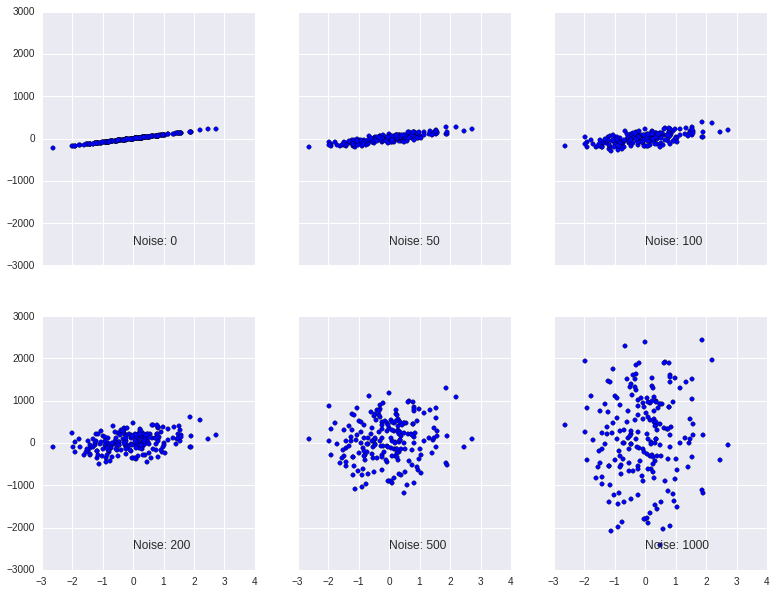

In [235]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(13, 10))

for i, noise in enumerate([0, 50, 100, 200, 500, 1000]):
    dataset_reg = make_regression(n_samples=200, n_features=1, n_informative=1, noise=noise, random_state=42)
    if i < 3:
        ax = axes[0][i % 3]
    else:
        ax = axes[1][i % 3]
    ax.text(0, -2500, 'Noise: {}'.format(noise), fontsize=12, horizontalalignment='left')
    ax.scatter(dataset_reg[0], dataset_reg[1])

# Generating dataset for clustering problem


Now we can prepare some dataset for clustering problem. We set our 3 centers with standard deviation 5. 

In [232]:
dataset_clust = make_blobs(n_samples=200, centers=3, cluster_std=5)
df_clust = pd.DataFrame({
    'feature1': dataset_clust[0][:, 0],
    'feature2': dataset_clust[0][:, 1],
    'target': dataset_clust[1]
})

df_clust.head()

,feature1,feature2,target
0,-3.999994,5.438477,1
1,3.863519,8.583669,2
2,6.546160,2.544475,0
3,2.129761,11.670131,1
4,1.468909,-1.069517,0


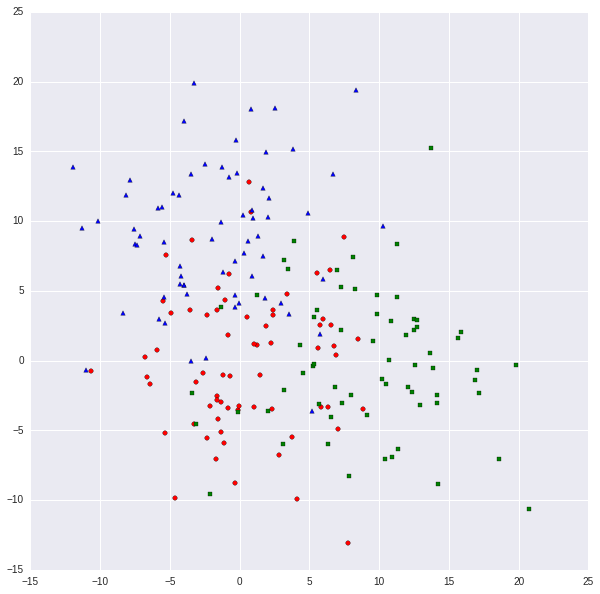

In [234]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10, 10))

for c, m, target in [('r', 'o', 0), ('b', '^', 1), ('g', 's', 2)]:
    xs = df_clust[df_clust.target==target].feature1
    ys = df_clust[df_clust.target==target].feature2
    axes.scatter(xs, ys,  c=c, marker=m)
    
plt.show()